In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import proplot as pplt
import seaborn as sns
from tqdm import trange

In [2]:
pplt.rc['axes.grid'] = False
pplt.rc['cmap.discrete'] = False
pplt.rc['figure.facecolor'] = 'white'

In [3]:
phase_devs_x = np.degrees(np.loadtxt('_output/data/phase_devs_x.dat'))
phase_devs_y = np.degrees(np.loadtxt('_output/data/phase_devs_y.dat'))
condition_numbers_xx = np.loadtxt('_output/data/condition_numbers_xx.dat')
condition_numbers_yy = np.loadtxt('_output/data/condition_numbers_yy.dat')
condition_numbers_xy = np.loadtxt('_output/data/condition_numbers_xy.dat')
fail_rates = np.loadtxt('_output/data/fail_rates.dat')
eps_x_means = 1e6 * np.loadtxt('_output/data/eps_x_means.dat')
eps_y_means = 1e6 * np.loadtxt('_output/data/eps_y_means.dat')
eps_1_means = 1e6 * np.loadtxt('_output/data/eps_1_means.dat')
eps_2_means = 1e6 * np.loadtxt('_output/data/eps_2_means.dat')
eps_x_stds = 1e6 * np.loadtxt('_output/data/eps_x_stds.dat')
eps_y_stds = 1e6 * np.loadtxt('_output/data/eps_y_stds.dat')
eps_1_stds = 1e6 * np.loadtxt('_output/data/eps_1_stds.dat')
eps_2_stds = 1e6 * np.loadtxt('_output/data/eps_2_stds.dat')

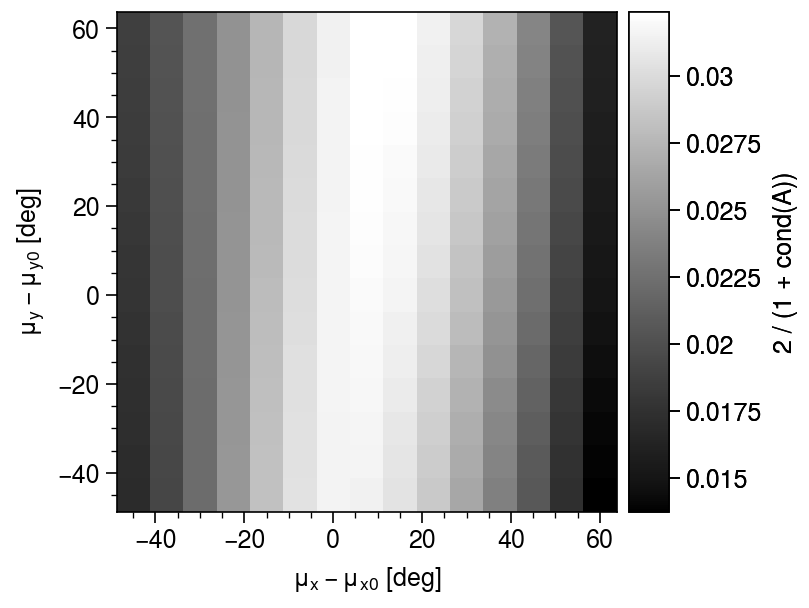

In [4]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_xx)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              cmap=pplt.Colormap('mono_r'), ec='none', shading='auto',
              colorbar=True, colorbar_kw=dict(label='2 / (1 + cond(A))')
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
# ax.scatter(0, 0, color='red', s=18, label='Default optics')
# ax.scatter(45.0, -45.0, color='blue6', s=18, label='Modified optics')
# ax.legend(loc=(0, 1), ncol=2, framealpha=0)
plt.savefig('_output/figures/inv_condition_numbers_xx.png', facecolor='white', dpi=300)
plt.show()

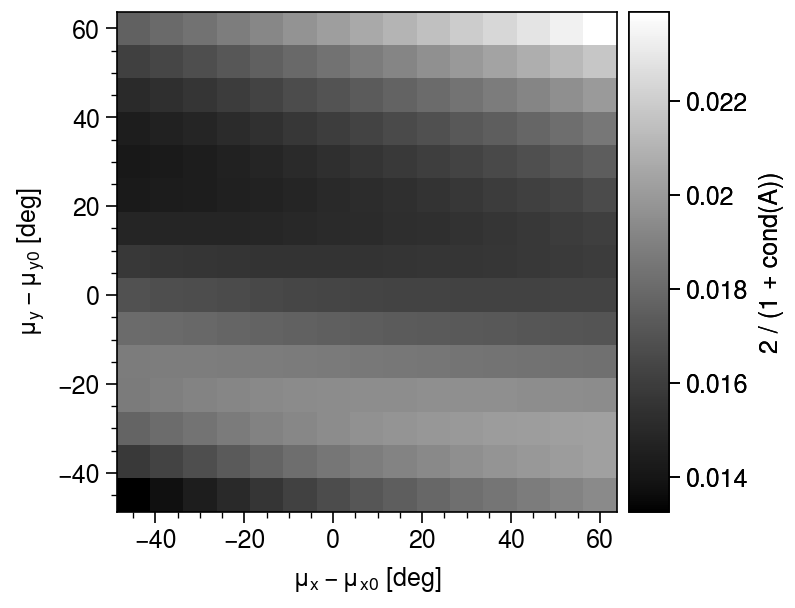

In [5]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_yy)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              cmap=pplt.Colormap('mono_r'), ec='none', shading='auto',
              colorbar=True, colorbar_kw=dict(label='2 / (1 + cond(A))')
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
# ax.scatter(0, 0, color='red', s=18, label='Default optics')
# ax.scatter(45.0, -45.0, color='blue6', s=18, label='Modified optics')
# ax.legend(loc=(0, 1), ncol=2, framealpha=0)
plt.savefig('_output/figures/inv_condition_numbers_yy.png', facecolor='white', dpi=300)
plt.show()

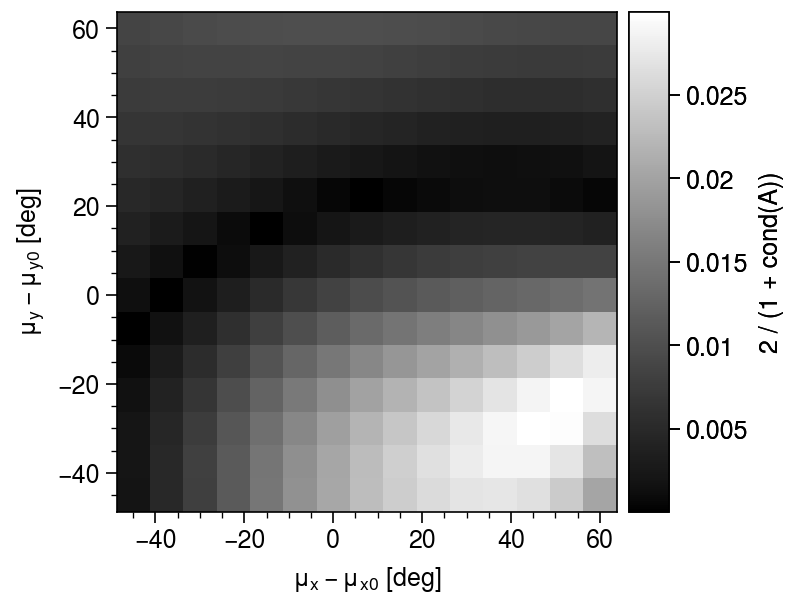

In [16]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_xy)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              cmap=pplt.Colormap('mono_r'), ec='none', shading='auto',
              colorbar=True, colorbar_kw=dict(label='2 / (1 + cond(A))')
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
# ax.scatter(0, 0, color='red', s=18, label='Default optics')
# ax.scatter(45.0, -45.0, color='blue6', s=18, label='Modified optics')
# ax.legend(loc=(0, 1), ncol=2, framealpha=0)
plt.savefig('_output/figures/inv_condition_numbers_xy.png', facecolor='white', dpi=300)
plt.show()

In [7]:
condition_numbers_sum = condition_numbers_xx + condition_numbers_yy + condition_numbers_xy

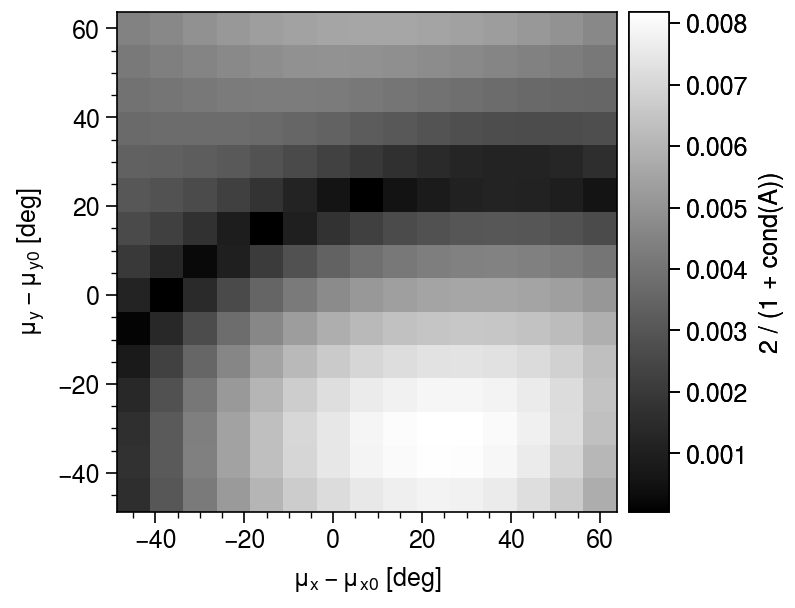

In [8]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_sum)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              cmap=pplt.Colormap('mono_r'), ec='none', shading='auto',
              colorbar=True, colorbar_kw=dict(label='2 / (1 + cond(A))')
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
# ax.scatter(0, 0, color='red', s=18, label='Default optics')
# ax.scatter(45.0, -45.0, color='blue6', s=18, label='Modified optics')
# ax.legend(loc=(0, 1), ncol=2, framealpha=0)
plt.savefig('_output/figures/inv_condition_numbers_sum.png', facecolor='white', dpi=300)
plt.show()

In [9]:
cmap = 'viridis'

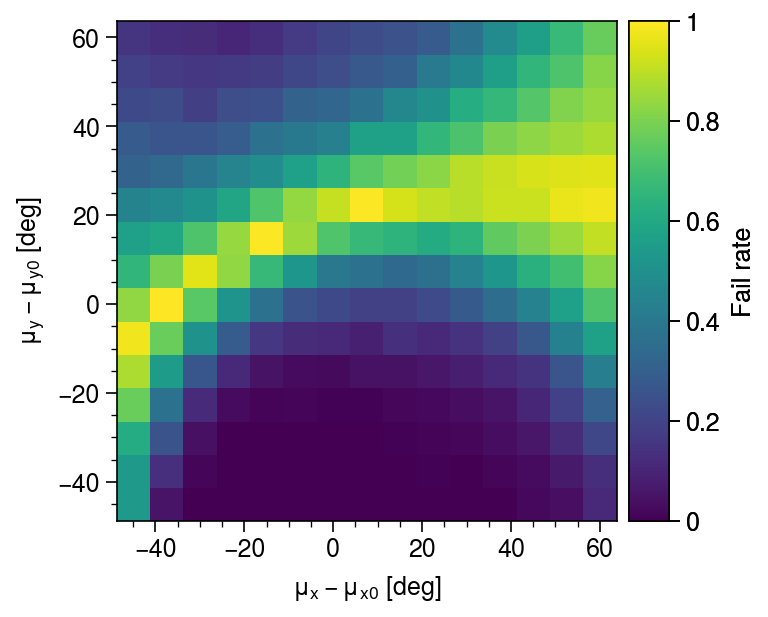

In [10]:
fig, ax = pplt.subplots()
ax.pcolormesh(phase_devs_x, phase_devs_y, fail_rates.T, cmap=cmap, 
              vmin=0, vmax=1,
              colorbar=True, colorbar_kw=dict(label='Fail rate'))
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
# ax.scatter(0, 0, color='red', s=18, label='Default optics')
# ax.scatter(45.0, -45.0, color='blue6', s=18, label='Modified optics')
# ax.legend(loc=(0, 1), ncol=2, framealpha=0)
plt.savefig('_output/figures//fail_rates.png', dpi=300, facecolor='white')
plt.show()

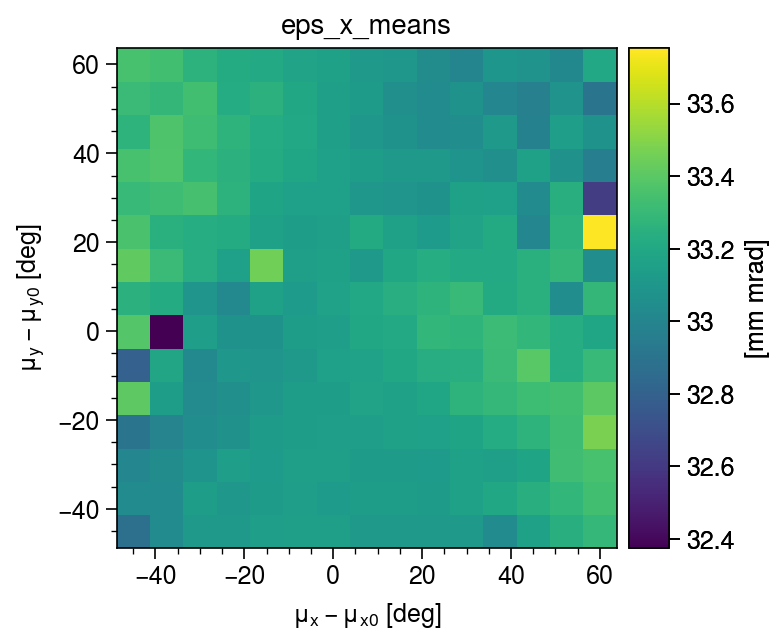

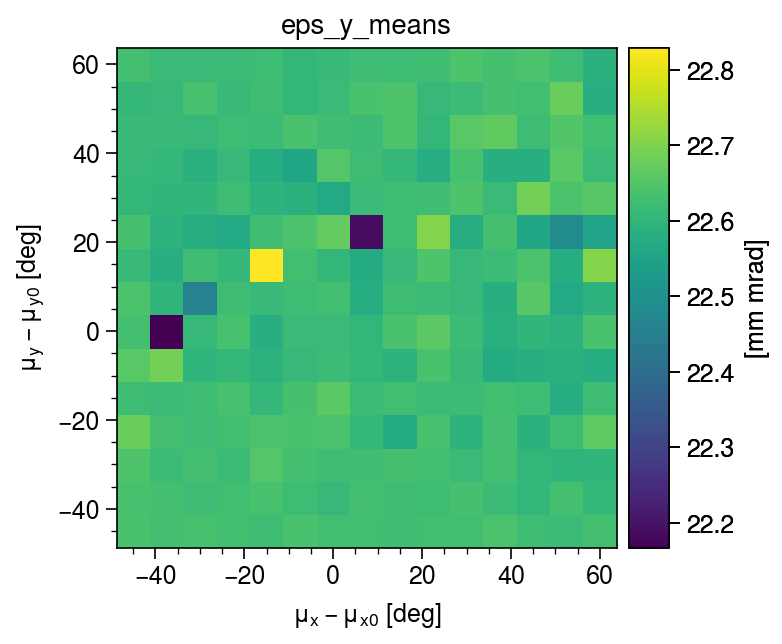

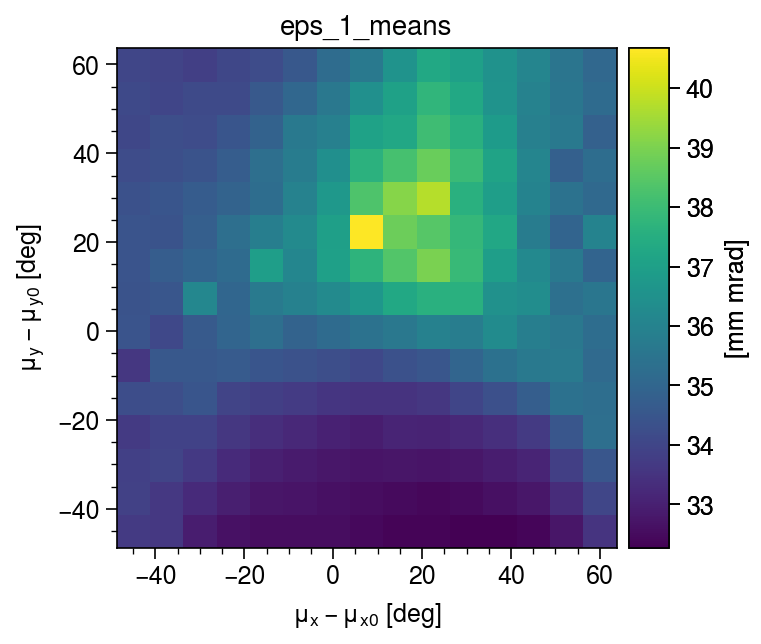

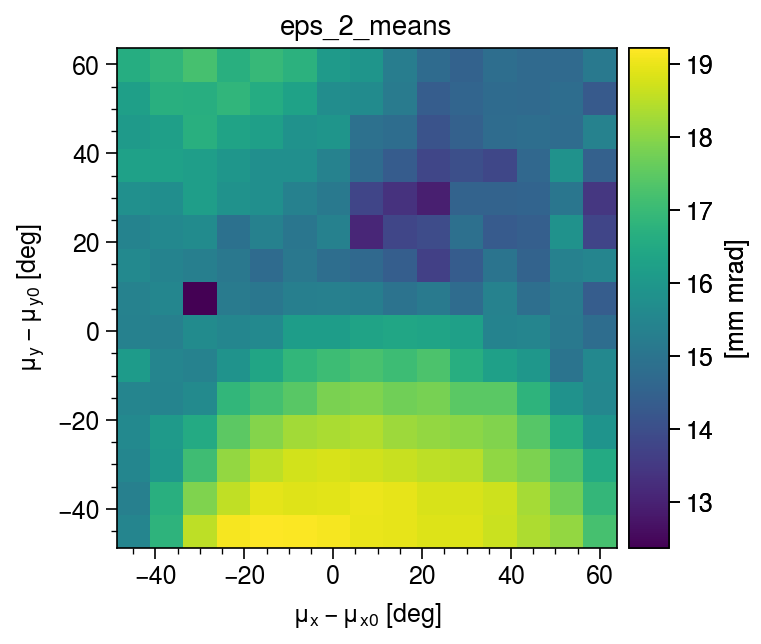

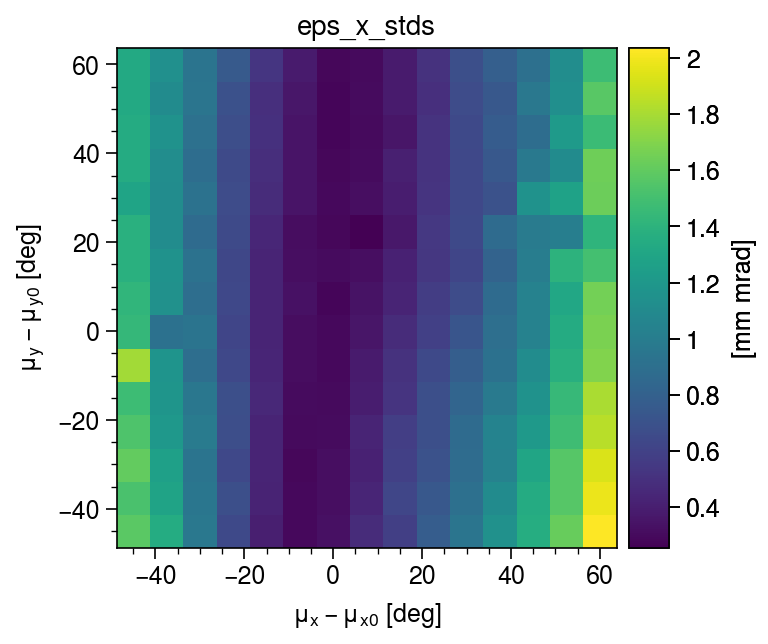

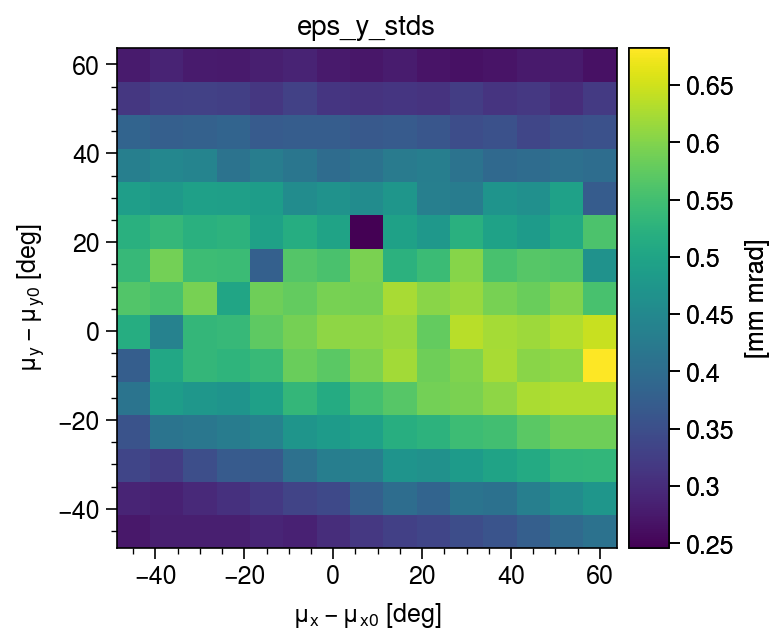

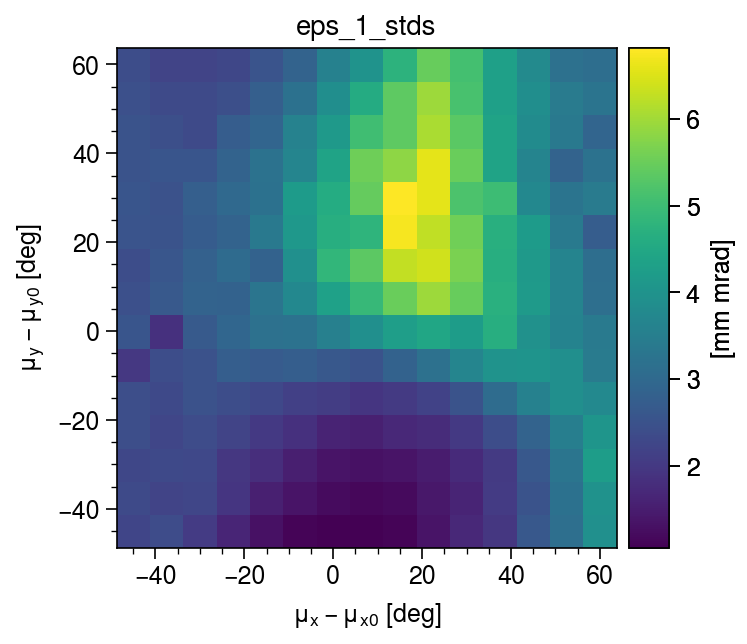

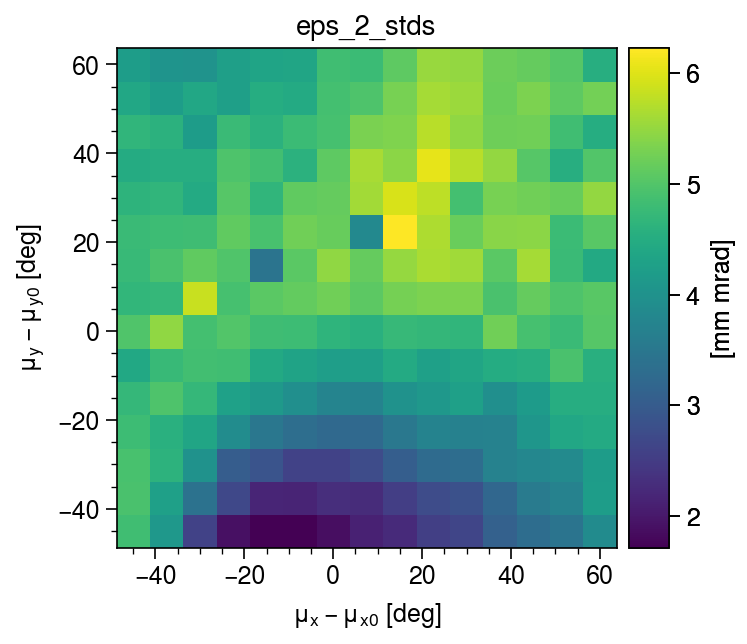

In [11]:
titles = ['eps_x_means', 'eps_y_means', 'eps_1_means', 'eps_2_means', 
          'eps_x_stds', 'eps_y_stds', 'eps_1_stds', 'eps_2_stds']
datas = [eps_x_means, eps_y_means, eps_1_means, eps_2_means,
         eps_x_stds, eps_y_stds, eps_1_stds, eps_2_stds]

for title, data in zip(titles, datas):
    fig, ax = pplt.subplots()
    ax.pcolormesh(phase_devs_x, phase_devs_y, data.T, cmap=cmap, colorbar=True, colorbar_kw=dict(label='[mm mrad]'))
    ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]', title=title, 
             )
    plt.show()